In [59]:
import networkx as nx

In [2]:
import pandas as pd

In [3]:
edge_list = 'kegg_ko_edge_df_br_ko00001.txt_AAI_lengths_n_50_f_10_r_100.txt'

In [4]:
pw_dist = 'KOs_sketched_scaled_10_compare_5'

In [87]:
G = nx.read_edgelist(edge_list, delimiter='\t', nodetype=str, create_using=nx.DiGraph, data=(('edge_length', float),))

In [28]:
nx.is_tree(G)

True

In [ ]:
sub_root = '09150 Organismal Systems'

In [23]:
Gsub = G.subgraph(nx.descendants(G, sub_root))

In [29]:
nx.is_tree(Gsub)

False

In [36]:
Gsub_undir = Gsub.to_undirected()

In [44]:
components = nx.connected_components(Gsub_undir)

In [45]:
Gsub_components = {}
for i, c in enumerate(components):
    print(c)
    Gsub_components[i] = c

{'K01446', 'K24669', 'K23817', 'K12806', 'K20692', 'K12229', 'K20909', 'K24077', 'K12792', 'K06787', 'K06779', 'K20735', 'K20899', 'K03899', 'K12801', '04622 RIG-I-like receptor signaling pathway', '04662 B cell receptor signaling pathway', 'K20914', '04621 NOD-like receptor signaling pathway', 'K20693', 'K20700', 'K20916', 'K07987', '04672 Intestinal immune network for IgA production', 'K07986', 'K20910', '04657 IL-17 signaling pathway', 'K24075', 'K00863', '04612 Antigen processing and presentation', '04611 Platelet activation', 'K12966', '04670 Leukocyte transendothelial migration', 'K12971', 'K21129', 'K20701', '04623 Cytosolic DNA-sensing pathway', 'K24096', '04664 Fc epsilon RI signaling pathway', 'K20915', 'K24097', 'K20695', 'K05690', 'K07988', '04613 Neutrophil extracellular trap formation', 'K20911', 'K05702', '04650 Natural killer cell mediated cytotoxicity', 'K03908', 'K20696', 'K20694', 'K03462', 'K07367', 'K20703', 'K03902', 'K20699', 'K20898', 'K20697', 'K24092', 'K12652

In [14]:
len(subtree.nodes)

37

In [16]:
subgraph_nodes = ['K19768', 'K19773', 'K19765', 'K22878', 'K19767', 'K19764', 'K19774', 'K10141', 'K19766', 'K19805', '04212 Longevity regulating pathway - worm', 'K11204', 'K14938', 'K20394', '04213 Longevity regulating pathway - multiple species', 'K19772', 'K13356', 'K17705', '09149 Aging', 'K01768', 'K19769', 'K19770', 'K19771', 'K01440', '04211 Longevity regulating pathway']

In [17]:
subtree = G.subgraph(subgraph_nodes)

In [18]:
nx.is_tree(subtree)

True

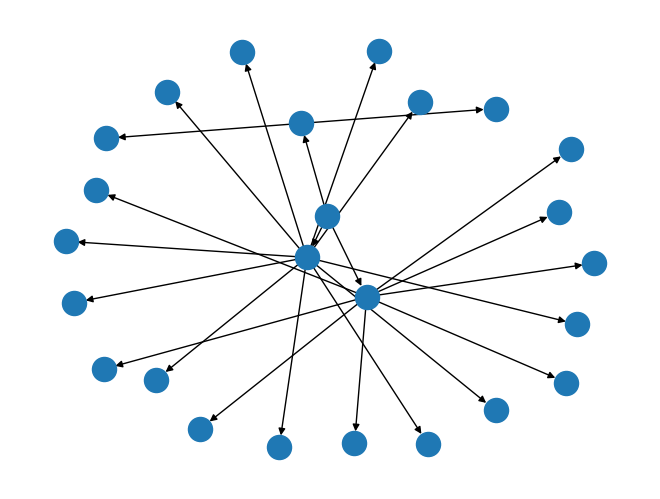

In [19]:
nx.draw(G.subgraph(subtree))

In [22]:
len(subgraph_nodes)

25

In [20]:
sub_leaves = [n for n in subtree.nodes if subtree.out_degree(n)==0]

In [21]:
len(sub_leaves)

21

In [53]:
sub_tree = G.subgraph(Gsub_components[0])

In [23]:
sub_root = [n for n in subtree.nodes if subtree.in_degree(n)==0]

In [24]:
sub_root

['09149 Aging']

In [30]:
for n in G.successors('09149 Aging'):
    print(n)

04212 Longevity regulating pathway - worm
04213 Longevity regulating pathway - multiple species
04211 Longevity regulating pathway


In [33]:
for n in G.successors('04211 Longevity regulating pathway'):
    print(n)

K20394
K10141


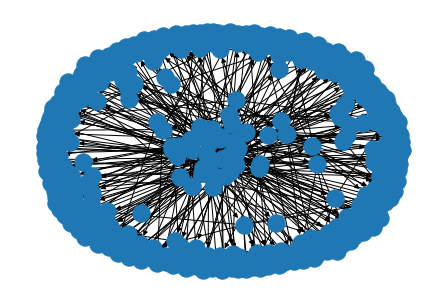

In [24]:
nx.draw(Gsub)

In [26]:
nx.is_tree(Gsub)

False

In [7]:
basis = [x for x in G.nodes]

In [11]:
len(basis)

25961

In [12]:
len(G.edges)

25960

In [12]:
basis_index = {node:i for i,node in enumerate(basis)}

In [13]:
G.subgraph('ko00001')

In [13]:
basis[0]

'ko00001'

In [14]:
for e in G.edges:
    print(e)
    break

('ko00001', '09180 Brite Hierarchies')


In [15]:
from scipy import sparse

In [21]:
import numpy as np

In [25]:
pw_df = np.load(pw_dist)

In [26]:
pw_df.shape

(14606, 14606)

In [49]:
pw_df

array([[1.        , 0.09543568, 0.21384574, ..., 0.00225145, 0.00593368,
        0.0146051 ],
       [0.09543568, 1.        , 0.09758502, ..., 0.00254453, 0.00416055,
        0.01457195],
       [0.21384574, 0.09758502, 1.        , ..., 0.00179658, 0.0062126 ,
        0.0138391 ],
       ...,
       [0.00225145, 0.00254453, 0.00179658, ..., 1.        , 0.        ,
        0.0037037 ],
       [0.00593368, 0.00416055, 0.0062126 , ..., 0.        , 1.        ,
        0.00574713],
       [0.0146051 , 0.01457195, 0.0138391 , ..., 0.0037037 , 0.00574713,
        1.        ]])

In [46]:
leaves = [node for node in G if G.out_degree(node)==0]

In [47]:
len(leaves)

25441

In [38]:
leaves[:10]

['09112 Not included in regular maps',
 '09113 Global maps only',
 '04964 Proximal tubule bicarbonate reclamation',
 '00515 Mannose type O-glycan biosynthesis',
 '02060 Phosphotransferase system (PTS)',
 '09142 Cell motility',
 '05215 Prostate cancer',
 '04960 Aldosterone-regulated sodium reabsorption',
 '04072 Phospholipase D signaling pathway',
 '00572 Arabinogalactan biosynthesis - Mycobacterium']

In [58]:
kegg_faa_ids = np.loadtxt('kegg_unique_faa_id.txt', dtype=str)

In [65]:
leaves = set(leaves)

In [63]:
extra_ko = leaves.difference(kegg_faa_ids)

In [64]:
len(extra_ko)

10837

In [67]:
list(extra_ko)[:10]

['K21272',
 'K20836',
 'K21506',
 'K15101',
 'K23357',
 'K10140',
 'K19526',
 'K17697',
 'K16726',
 'K11461']

In [78]:
extra_ko_df = pd.DataFrame(extra_ko)

In [82]:
extra_ko_df.to_csv('extra_ko.txt',header=False, index=False)

In [72]:
set(kegg_faa_ids).difference(leaves)

{'K17871', 'K18662'}

In [84]:
'K18662' in kegg_faa_ids

True

In [60]:
G = nx.Graph()
G.add_edge(1, 2, weight=7)
nx.write_weighted_edgelist(G, "test.weighted.edgelist")

In [64]:
#test
for edge in sub_tree.edges(data=True):
    parent = edge[0]
    child = edge[1]
    edge_length = edge[2]['edge_length']
    print(parent, child, edge_length)
    break

04622 RIG-I-like receptor signaling pathway K00863 0.00485278801241325


In [89]:
def write_subgraph_file(G, subgraph_nodes, out_file):
    sub_tree = G.subgraph(subgraph_nodes)
    with open(out_file, 'w') as f:
        f.write("#parent\tchild\tedge_length\n")
        for edge in sub_tree.edges(data=True):
            parent = edge[0]
            child = edge[1]
            edge_length = edge[2]['edge_length']
            print(parent, child, edge_length)
            f.write(f"{parent}\t{child}\t{edge_length}\n")
        return

In [70]:
sub_root = [n for n in sub_tree.nodes if sub_tree.in_degree(n)==0]

In [76]:
sub_tree_nodes = [node for node in sub_tree]

In [77]:
sub_tree_nodes[:4]

['K01446', 'K24669', 'K23817', 'K12806']

In [88]:
write_subgraph_file(G, sub_tree_nodes, 'sub_tree_09151ImmuneSystem_83nodes.txt')

['K01446', 'K24669', 'K23817', 'K12806', 'K20692', 'K12229', 'K20909', 'K24077', 'K12792', 'K06787', 'K06779', 'K20735', 'K20899', 'K03899', 'K12801', '04622 RIG-I-like receptor signaling pathway', '04662 B cell receptor signaling pathway', 'K20914', '04621 NOD-like receptor signaling pathway', 'K20693', 'K20700', 'K20916', 'K07987', '04672 Intestinal immune network for IgA production', 'K07986', 'K20910', '04657 IL-17 signaling pathway', 'K24075', 'K00863', '04612 Antigen processing and presentation', '04611 Platelet activation', 'K12966', '04670 Leukocyte transendothelial migration', 'K12971', 'K21129', 'K20701', '04623 Cytosolic DNA-sensing pathway', 'K24096', '04664 Fc epsilon RI signaling pathway', 'K20915', 'K24097', 'K20695', 'K05690', 'K07988', '04613 Neutrophil extracellular trap formation', 'K20911', 'K05702', '04650 Natural killer cell mediated cytotoxicity', 'K03908', 'K20696', 'K20694', 'K03462', 'K07367', 'K20703', 'K03902', 'K20699', 'K20898', 'K20697', 'K24092', 'K12652

In [90]:

def get_KeggTree_from_edgelist(edge_list_file):
    '''

    :param file:
    :return: KeggTree
    '''
    G = nx.read_edgelist(edge_list_file, delimiter='\t', nodetype=str, create_using=nx.DiGraph,
                         data=(('edge_length', float),))
    keggTree = KeggTree(G)
    return keggTree

In [92]:
class KeggTree():
    #a tree from edge_list with branch lengths
    def __init__(self, tree):
        self.tree = tree #an nx.DiGraph
        try:
            self.tree.remove_edge('parent','child')
            self.tree.remove_node('parent')
            self.tree.remove_node('child')
        except:
            print("'parent' and 'child' are not in the edge list")
        self.leaf_nodes = [node for node in self.tree if self.tree.out_degree(node) == 0]
        print(self.leaf_nodes)
        self.pw_dist = {}
        self.get_pw_dist()
        self.size = len(self.tree.nodes())

    def get_pw_dist(self):
        undir_tree = self.tree.to_undirected()
        for pair in combinations(self.leaf_nodes, 2):
            distance = nx.shortest_path_length(undir_tree, source=pair[0], target=pair[1], weight='edge_length')
            if pair[0] > pair[1]:
                self.pw_dist[(pair[1], pair[0])] = distance
            else:
                self.pw_dist[(pair[0], pair[1])] = distance

    def get_siblings(self, node):
        siblings = set()
        parents = self.tree.predecessors(node)
        for p in parents:
            for n in self.tree.successors(p):
                siblings.add(n)
        siblings.remove(node) #remove the node itself
        return siblings

    def get_parent(self, node):
        #get one parent
        for p in self.tree.predecessors(node):
            return p

    def get_child(self, node):
        #get one child
        for c in self.tree.successors(node):
            return c



In [93]:
sub_tree = get_KeggTree_from_edgelist('sub_tree_09151ImmuneSystem_83nodes.txt')
sub_tree

NameError: name 'edge_list_file' is not defined

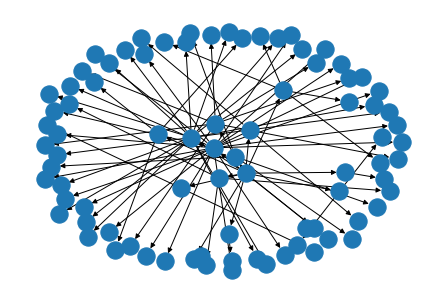

In [94]:
nx.draw(sub_tree)

In [96]:
G.get_edge_data('04622 RIG-I-like receptor signaling pathway', 'K00863')['edge_length']

0.00485278801241325

In [100]:
G.add_edge('test1', 'test2', edge_length=2)

In [101]:
G.get_edge_data('test1', 'test2')

{'edge_length': 2}